**Importing**

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
from copy import deepcopy
import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score

In [ ]:
import random as rd
from sklearn import preprocessing

In [ ]:
from sklearn import datasets
from keras.datasets import mnist

In [ ]:
import pandas as pd

import itertools

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

import matplotlib.gridspec as gridspec

from mlxtend.plotting import plot_decision_regions
from mlxtend.preprocessing import shuffle_arrays_unison

import seaborn as sns

from tqdm.notebook import tqdm_notebook as tqdm

**My model implementation (Neural network with one layer)**

In [ ]:
#Creating random Ws
def random_w(rows, columns, seed):
  rd.seed(seed)
  return [[rd.random() for i in range(columns)] for j in range(rows)]

In [ ]:
class NN:
  def __init__(self, iterations,learning_rate,layer_length):
    self.accuracy = 0
    self.iterations = iterations
    self.learning_rate = learning_rate
    self.input_length = 0
    self.output_length = 0
    self.layer_length = layer_length
    self.w_1 = []
    self.w_o = []

  #Training
  def fit(self, x_train, y_train):
    self.input_length = len(x_train[0])
    self.output_length = len(y_train[0])
    self.w_1 = random_w(self.layer_length,self.input_length,42)
    self.w_o = random_w(self.output_length,self.layer_length,41)
    train_samples_number = len(x_train)
    final = []
    for o in range(self.iterations):
      output_final_prediction = [None for _ in range(self.output_length)]
      for b in range(train_samples_number):
        input = x_train[b]
        target = y_train[b]
        #forward
        #layer
        net_1 = []
        output_1 = []
        for i in range(self.layer_length):
          net_1_temp = np.dot(input,self.w_1[i])
          net_1.append(net_1_temp)
          output_1_temp = 1/(1+np.exp(-net_1_temp))
          output_1.append(output_1_temp)
        #output
        net_final = []
        output_final = []
        for j in range(self.output_length):
          net_final_temp = np.dot(output_1,self.w_o[j])
          net_final.append(net_final_temp)
          output_final_temp = 1/(1+np.exp(-net_final_temp)) 
          output_final.append(output_final_temp)
        #Backward
        #output
        delta_final = []
        delta_W_o = []
        for k in range(self.output_length):
          delta_final_temp = (target[k] - output_final[k]) * output_final[k] * (1 - output_final[k])
          delta_final.append(delta_final_temp)
          delta_W_o_temp = []
          for m in range(self.layer_length):
            delta_W_o_temp_temp = self.learning_rate * delta_final_temp * output_1[m]
            delta_W_o_temp.append(delta_W_o_temp_temp)
            self.w_o[k][m] = self.w_o[k][m] + delta_W_o_temp_temp
          delta_W_o.append(delta_W_o_temp)
        #layer
        delta_1 = []
        delta_w_1 = []
        for l in range(self.layer_length):
          w_o_prepare = []
          for n in range(self.output_length):
            w_o_prepare.append(self.w_o[n][l])
          delta_1_temp = np.dot(delta_final,w_o_prepare)*output_1[l]*(1-output_1[l])
          delta_1.append(delta_1_temp)
          delta_w_1_temp = []
          for f in range(self.input_length):
            delta_w_1_temp_temp = delta_1_temp * input[f] * self.learning_rate
            delta_w_1_temp.append(delta_w_1_temp_temp)
            self.w_1[l][f] = self.w_1[l][f] + delta_w_1_temp_temp
          delta_w_1.append(delta_w_1_temp)
      for u in range(self.output_length):
        output_final_prediction[u] = round(output_final[u])
      final.append(output_final_prediction)
 #Testing
  def predict(self,x_test, y_test):
    test_samples_number = len(x_test)
    self.output_length = len(y_test[0])
    final_test = []
    error = 0
    for b in range(test_samples_number):
      input = x_test[b]
      target = y_test[b]
      output_final_prediction = [None for _ in range(self.output_length)]
      for o in range(1):
        #forward
        #layer
        net_1 = []
        output_1 = []
        for i in range(self.layer_length):
          net_1_temp = np.dot(input,self.w_1[i])
          net_1.append(net_1_temp)
          output_1_temp = 1/(1+np.exp(-net_1_temp))
          output_1.append(output_1_temp)
        #output
        net_final = []
        output_final = []
        for j in range(self.output_length):
          net_final_temp = np.dot(output_1,self.w_o[j])
          net_final.append(net_final_temp)
          output_final_temp = 1/(1+np.exp(-net_final_temp)) 
          output_final.append(round(output_final_temp))
        if (output_final != target):
          error+= 1  
        final_test.append(output_final)
    #getting accuracy
    accuracy = (test_samples_number - error)/test_samples_number
    self.accuracy = accuracy

**mnist data**

Visualisation

In [ ]:
digits = datasets.load_digits()

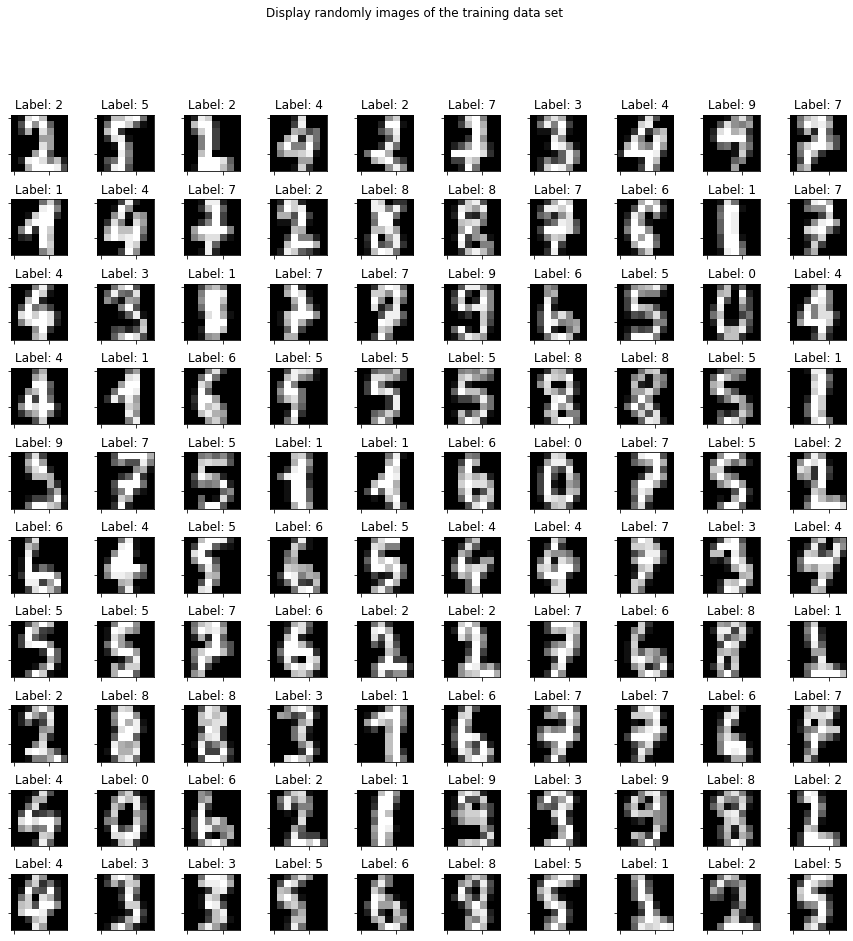

In [ ]:
# A helper display function

# check the reshape line, adjust it if needed for your image size
def displayData(X,Y):
    # set up array
    fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(15,15))
    fig.suptitle( "Display randomly images of the training data set")
    # loop over randomly drawn numbers
    for i in range(10):
        for j in range(10):
            ind = np.random.randint(X.shape[0])
            tmp = X[ind,:].reshape(8,8)
            ax[i,j].set_title("Label: {}".format(Y[ind]))
            ax[i,j].imshow(tmp, cmap='gray') # display it as gray colors.
            plt.setp(ax[i,j].get_xticklabels(), visible=False)
            plt.setp(ax[i,j].get_yticklabels(), visible=False)
    
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    return tmp
data = displayData(digits.images,digits.target) 

Loading data

In [ ]:
mnistt = fetch_openml('mnist_784')

In [ ]:
X, y = mnistt['data'], mnistt['target']

pre-processing

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
#train test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#shuffling
X_train, y_train = shuffle_arrays_unison(arrays=[X_train, y_train], random_seed=42)
X_test, y_test = shuffle_arrays_unison(arrays=[X_test, y_test], random_seed=42)
#normalize the data attributes
#getting some information about data
print("x train:", X_train.shape)
print("y train:", y_train.shape)
print("x test:", X_test.shape)
print("x test:", y_test.shape)
print("x train max:",X_train.max())
print("x train min:",X_train.min())
print("y train max:",y_train.max())
print("y train min:",y_train.min())
#make each image in a row
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)
#scaling to have range of [0:1]
X_train_scaled = X_train.astype('float32') / 255.0
X_test_scaled = X_test.astype('float32') / 255.0
#getting less data for time
X_train_less = X_train_scaled[0:1000,:]
X_test_less = X_test_scaled[0:200,:]
y_train_less = y_train[0:1000]
y_test_less = y_test[0:200]
#normalization
X_train_less = preprocessing.normalize(X_train_less).tolist()
X_test_less = preprocessing.normalize(X_test_less).tolist()
y_train_less = y_train[0:1000].tolist()
y_test_less = y_test[0:200].tolist()
#Hot coding the output
y_train_less = pd.get_dummies(y_train_less).to_numpy().tolist()
y_test_less = pd.get_dummies(y_test_less).to_numpy().tolist()

x train: (56000, 784)
y train: (56000,)
x test: (14000, 784)
x test: (14000,)
x train max: 255.0
x train min: 0.0
y train max: 9
y train min: 0


**1. Neural network with one layer on mnist data**

In [ ]:
nn = NN(100,0.2,10)
nn.fit(X_train_less, y_train_less)
nn.predict(X_test_less, y_test_less)
print("Accuracy:", str(nn.accuracy*100)+"%")

Accuracy: 10.5%


**My K-means**

Implementation

In [ ]:
def k_mean_clustering(X,k):
  '''
  Input: X data
  Output: y data clustered (pretected labels)
  '''
  #pre-processing
  X = np.asarray(X)

  #number of training data
  n = X.shape[0]

  #number of features in the data
  c = X.shape[1]

  # Generate random centers by randomly selecting k data points from the dataset
  random_i = np.random.choice(np.arange(n), size=k, replace=False)
  centers = X[random_i]

  centers_old = np.zeros(centers.shape) # to store old centers
  centers_new = deepcopy(centers) # Store new centers

  clusters = np.zeros(n)
  distances = np.zeros((n, k))

  #flag for stop 
  flag = np.linalg.norm(centers_new - centers_old)

  while flag != 0:
      # Measure the distance to every center
      for i in range(k):
          distances[:,i] = np.linalg.norm(X - centers[i], axis=1)
      # Assign all training data to closest center
      clusters = np.argmin(distances, axis = 1)
    
      centers_old = deepcopy(centers_new)
      # Calculate mean for every cluster and update the center
      for i in range(k):
          centers_new[i] = np.mean(X[clusters == i], axis=0)
      flag = np.linalg.norm(centers_new - centers_old)
      return clusters

Applying

In [ ]:
# Number of clusters
k = 10

#Applying k-mean clustering
clusters = k_mean_clustering(X,k)

Score

In [ ]:
# Print the percentage of points in each cluster
print(np.bincount(clusters) / len(X))

[0.17138571 0.09215714 0.04737143 0.03708571 0.0768     0.05298571
 0.34298571 0.11732857 0.03468571 0.02721429]


In [ ]:
# calculate silhouette score
silhouette_score = silhouette_score(X, clusters)

print(silhouette_score)

0.03364887888068761


**Built in K-means**

Applying

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_openml
import numpy as np

# Perform k-means clustering with 10 clusters
kmeans = KMeans(n_clusters=10, random_state=0).fit(X)

# Obtain cluster labels for each data point
labels = kmeans.labels_

Score

In [ ]:
# Print the percentage of points in each cluster
print(np.bincount(labels) / len(X))

[0.07587143 0.1425     0.09261429 0.09674286 0.09511429 0.12391429
 0.0711     0.14922857 0.07602857 0.07688571]


In [ ]:
# calculate silhouette score
silhouette_score = silhouette_score(X, labels)

print(silhouette_score)


0.05869272931860969


**2. Neural network with one layer on mnist data with clustering**

pre-processing

In [ ]:
y = clusters

In [ ]:
#train test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Applying

In [ ]:
nn = NN(100,0.2,10)
nn.fit(X_train_less, y_train_less)
nn.predict(X_test_less, y_test_less)
print("Accuracy:", str(nn.accuracy*100)+"%")

Accuracy: 35.0%


**Comments**



```
1. I used silhouette score which has [-1,1] range to judge the clustring.
2. my clustering score (0.03364887888068761) is near to sklearn score (0.05869272931860969) which mean that my clustring is good.

```





```
3. I used the percentage of points in each cluster, too.
4. I found that my percentages are near to sklearn percentages.
```





```
5. I used my NN with one layer, 100 iterations, 0.2 learning rate, and 10 layer length for both mnist with and without clustering.
6. Unexpectedly, I found that accuracy of NN with data clustered (35%) is higher than the accuracy of NN with data not clustered (10.5%).
```





```
7. I searched for the reasons of this and found that:

*   Clustering the data can help to identify patterns or groupings within the data that may not be immediately apparent. By training a model on the cluster data, you can build a more specialized model that is better able to make accurate predictions within those clusters.
*   Clustering the data can help to reduce the dimensionality of the data, which can make it easier for the model to learn from the data and make accurate predictions.
*   Clustering the data can help to balance the classes of the data. In case if you have imbalanced data, clustering can help in balancing the class of the data which will help the model to perform better.
*   Clustering can also help to identify and remove any outliers in the data, which can improve the model's accuracy by reducing the amount of noise in the data.
*   The clustering algorithm used also matters, while some are just to group similar data points together, some like Kmeans, helps in reducing the dimension of the data as well, which could be contributing to the improvement in accuracy.
*   It's also worth noting that the performance of a model can vary depending on many factors, including the size and quality of the data, the architecture of the model, and the tuning of the model's parameters. So clustering the data is just one of many possible techniques to improve accuracy, and the improvement in accuracy may depend on the specific use case.
```

